# [E-03] CameraSticker
"Exploration Node 3. Camera Sticker App" / 2022. 01. 18 (Tue) 이형주

## Contents
---
- **최초 이미지 및 모델링 준비 - 미국 전 대통령 도널드 트럼프님**
- **얼굴 감지**
- **얼굴 이목구비 위치 탐색**
- **스티커 위치좌표 설정 및 조정**
- **다양한 케이스에 적용하기**
    - **Case1: 얼굴이 멀리 떨어진 경우 - 정치인 허경영님**
    - **Case2: 얼굴이 큰 경우 - 스타크래프트 프로게이머 홍구님**
    - **Case3: 얼굴 각도가 틀어진 경우 - 배우 진세연님**
- **프로젝트 회고**


## Rubric 평가기준
---

|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.|원본에 스티커 사진이 정상적으로 합성되었다.
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.|정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

### 1. 최초 이미지 및 모델링 준비 - 미국 전 대통령 도널드 트럼프님 (정면)

In [2]:
## 모델링 Import
## dlib: 얼굴의 겉 경계선(landmark)을 이미지에서 분리하는 역할을 한다.
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
print('import 완료 !')

import 완료 !


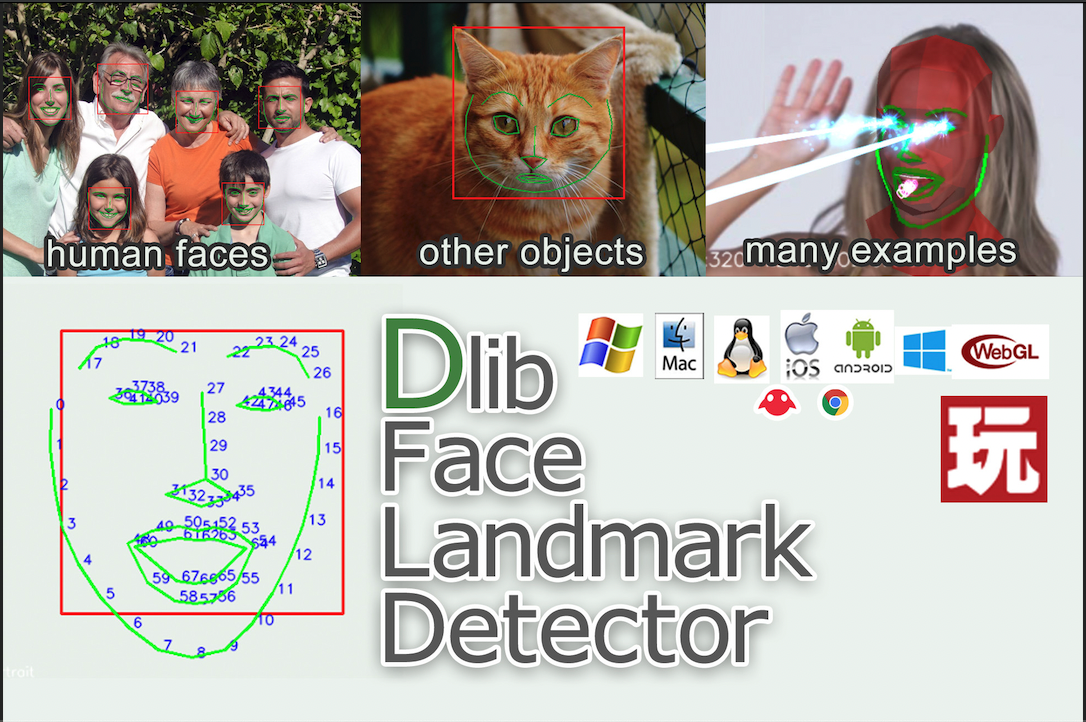

#### 오늘 프로젝트의 메인이 될 Dlib 이다. Face Detection을 할 때 사용한다.
위 사진에서 확인되는 것처럼, 아래와 같은 순서로 진행할 예정이다.
+ 1) 빨간색 정사각형으로 얼굴을 먼저 감지하였으며, 
+ 2) 초록색으로 얼굴 경계선(landmark)이 위치와 숫자로 추출되었고, 
+ 3) 스티커를 얼굴 위에 정교하게 부착하는 형태의 작업
+ 4) (+) 다양한 형태, 거리에 따른 얼굴에도 잘 부착되는지 실험

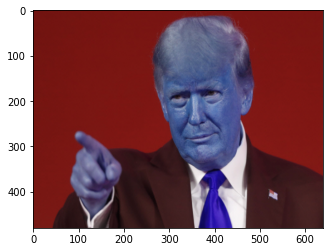

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/step1_yourfired.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 480 크기로 Resizing 처리하고
img_show = img_bgr.copy()      #- 출력용 이미지를 별도로 복사한다.
plt.imshow(img_bgr)
plt.show()

### 트럼프님 모습이 (영화) 아바타처럼 푸른 색깔을 띄는 이유

Python에서 OpenCV는 컬러 사진을 BGR 순서로 저장하는데, Matplotlib에서는 RGB 순서로 저장하므로 BGR -> RGB로 다시 바꾸는 작업이 필요하다. **따라서 아래 변환 코드는 예시별로 항상 따라가게 된다.** 원본 사진을 아래에서 바로잡았다.

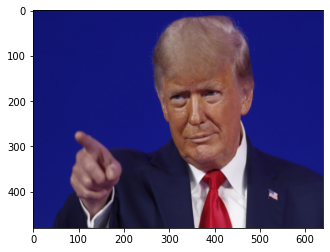

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
## bgr를 rgb로!
plt.imshow(img_rgb)
## 이미지를 rgb로 보여준다.
plt.show()

### 2. 얼굴 감지

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print('import 완료 !')

dlib_rects = detector_hog(img_rgb, 1) ## Image Pyramid에서 더 정확한 검출 처리 (1 - 피라미드의 갯수)
print(dlib_rects)  # 검출한 얼굴 영역 좌표

import 완료 !
rectangles[[(262, 139) (448, 325)]]


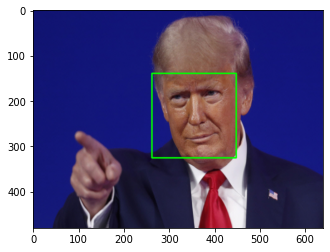

In [5]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## dlib로 얼굴 영역을 박스(정사각형) 형태로 처리한다.
## dlib_rect는 여기에서 left, top, right, bottom()의 함수를 처리하였다.

### 3. 얼굴 이목구비 위치 탐색

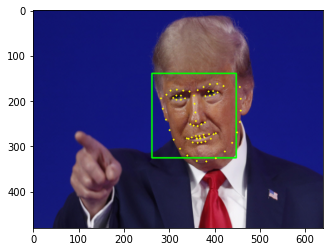

In [8]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### list_landmark는 총 68개의 튜플로 구성된 리스트 형태이다. 아래는 landmark 포인트 순서를 보여준다.

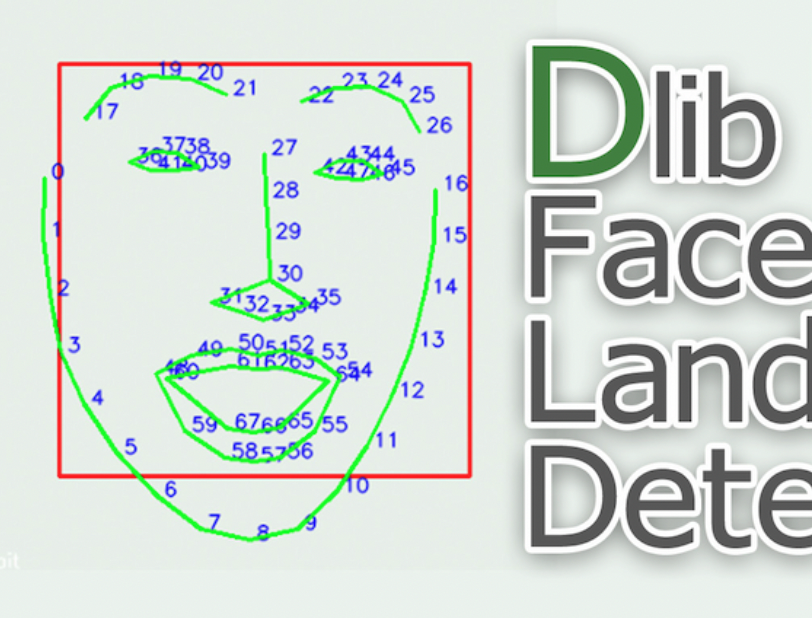



### 4. 스티커 위치좌표 설정 및 조정

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # left cheek index : 2
## 붙일 스티커는 고양이 수염이다. 따라서 코의 중심 위치를 찾는다. 
## 위 사진을 참고하여 보면 33번이 정 중앙임을 알 수 있다.
    x = landmark[33][0]
    y = landmark[33][1] 
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(363, 255)
(x,y) : (363,255)
(w,h) : (187,187)


(187, 187, 3)


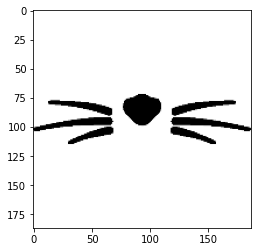

(x, y): (270, 162)


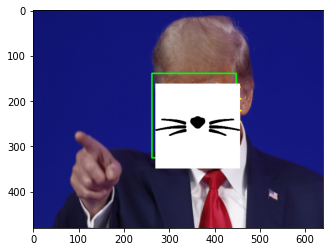

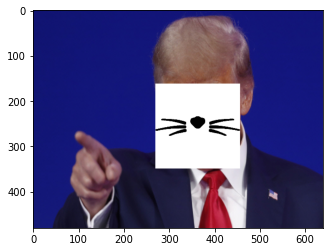

In [12]:
## 트럼프에게 붙일 고양이 수염 이미지를 불러온다.

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/catmustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

## 위에서 계산된 트럼프 얼굴 이미지의 크기를 계산하여 수염 크기를 맞춰준다.
refined_x = x - w // 2
refined_y = y - w // 2
print('(x, y): (%d, %d)'%(refined_x, refined_y))

## 맞춰준 수염의 크기를 이미지에 붙여서 출력한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 마지막으로 얼굴의 경계선 추출 부분을 제거하여 결과물을 본다.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 수염의 검정색 부분만 위에 덮어씌울 방법은 없을까

이 노드 제작자는 [np.where(img_sticker==255)로 설정](https://jinlee487.github.io/aiffel-exploration/aiffel-post-37/)하였다. 다만 그 이유를 이해하지 못하고 있다가, [OpenCV 이미지 합성에 대한 글](https://bkshin.tistory.com/entry/OpenCV-9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B0%EC%82%B0)을 우연히 확인하게 되었다. 그리고 아래 문장에서 약간의 힌트를 얻은 것 같다.

**"numpy의 합 연산을 수행하면 픽셀 값이 255가 넘는 경우 초과 값만을 갖기 때문에 이미지가 검은색에 가깝게 됩니다."**

image_sticker 값이 255이면, sticker_area에 (고양이 수염 사진을) 붙이라는 의미라고만 해석하지 않고, 255로 두었을 때에 이미지 합성을 수행시 검은 영역만 남기고 날려버리지 않을까? 하는 생각이 들어 코드를 수정 후 재실행 하였다.

(187, 187, 3)


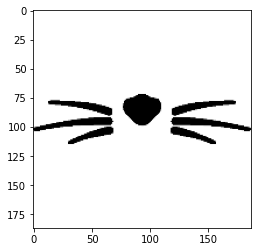

(x, y): (270, 162)


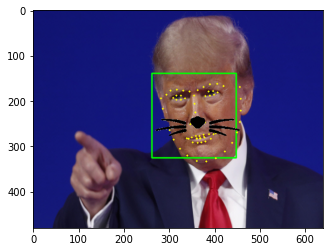

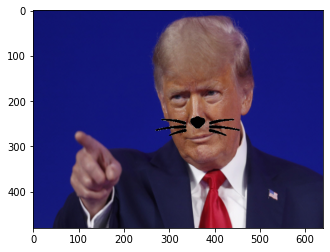

In [10]:
## 트럼프에게 붙일 고양이 수염 이미지를 불러온다.

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/catmustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

## 위에서 계산된 트럼프 얼굴 이미지의 크기를 계산하여 수염 크기를 맞춰준다.
refined_x = x - w // 2
refined_y = y - w // 2
print('(x, y): (%d, %d)'%(refined_x, refined_y))

## 맞춰준 수염의 크기를 이미지에 붙여서 출력한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
## 0을 255로 수정

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 마지막으로 얼굴의 경계선 추출 부분을 제거하여 결과물을 본다.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
## 0을 255로 수정

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

깔끔하게 적용 되었다. 다음 예시에는 각도가 틀어진 경우도 사례에 포함시켜보고자 한다.

### 5. 다양한 케이스에 적용하기

#### Case1: 얼굴이 멀리 떨어진 경우 - 정치인 허경영님

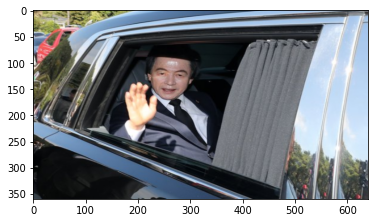

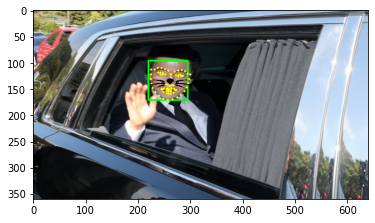

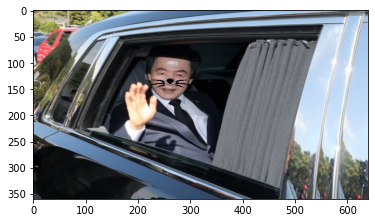

In [11]:
## 원본 이미지를 불러오고, 640 x 360으로 리사이징 한다.
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/step2_rightnow.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

## 이미지 위에 얼굴을 detection 하여 정사각형 박스 형태로 출력한다.
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 얼굴의 경계선을 따올 모델을 불러온다.
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0,255,255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 코 정 중앙을 찾아 스티커를 붙일 위치 및 크기를 계산한다.
## landmark x, y [33] -> [30]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
## 고양이 수염 스티커를 가져온 뒤, 붙일 이미지에 맞도록 resizing 처리한다.
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/catmustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

## 이미지 시작점을 기준으로 고양이 수염 스티커 이미지를 맞춰준다.
refined_x = x - w // 2
refined_y = y - w // 2

## 사진에 고양이 수염 스티커를 붙인다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 얼굴 detection 부분과 경계선을 지우고 최종 결과물을 본다.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### Case2: 얼굴이 가깝고 큰 경우 - 스타크래프트 프로게이머 임홍규(홍구)님

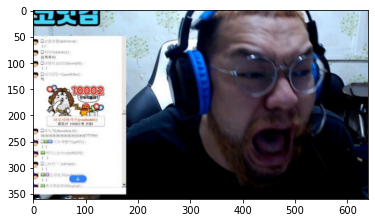

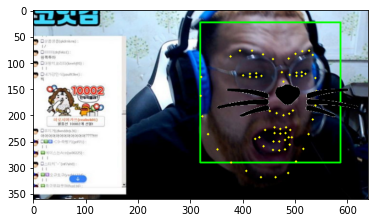

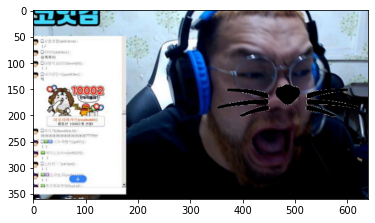

In [9]:
## 원본 이미지를 불러오고, 640 x 360으로 리사이징 한다.
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/step3_actionhonggu.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

## 이미지 위에 얼굴을 detection 하여 정사각형 박스 형태로 출력한다.
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 얼굴의 경계선을 따올 모델을 불러온다.
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0,255,255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 코 정 중앙을 찾아 스티커를 붙일 위치 및 크기를 계산한다.
## landmark x, y [33] -> [30]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
## 고양이 수염 스티커를 가져온 뒤, 붙일 이미지에 맞도록 resizing 처리한다.
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/catmustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

## 이미지 시작점을 기준으로 고양이 수염 스티커 이미지를 맞춰준다.
refined_x = x - w // 2
refined_y = y - w // 2

## 사진에 고양이 수염 스티커를 붙인다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 얼굴 detection 부분과 경계선을 지우고 최종 결과물을 본다.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

그림자로 인하여, 목과 얼굴 경계면이 뚜렷하지 않아 얼굴 형상이 조금 크게 잡힌 경향이 있는데, 코 정중앙 부분의 detection은 정확히 이루어졌다.

#### Case3: 얼굴 각도가 틀어진 경우 - 배우 진세연님

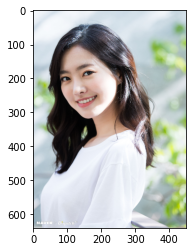

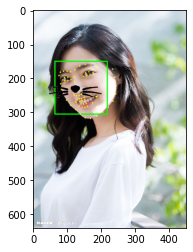

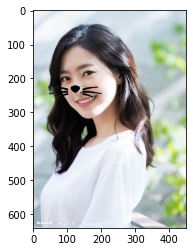

In [7]:
## 원본 이미지를 불러오고, 640 x 450으로 리사이징 한다.
## 세로가 긴 사진이므로 x, y 값을 바꾸고 가로 값을 더 여유를 주었다.
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/step4_jinseyeon.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (450, 640))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

## 이미지 위에 얼굴을 detection 하여 정사각형 박스 형태로 출력한다.
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 얼굴의 경계선을 따올 모델을 불러온다.
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0,255,255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 코 정 중앙을 찾아 스티커를 붙일 위치 및 크기를 계산한다.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
## 고양이 수염 스티커를 가져온 뒤, 붙일 이미지에 맞도록 resizing 처리한다.
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/catmustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

## 이미지 시작점을 기준으로 고양이 수염 스티커 이미지를 맞춰준다.
refined_x = x - w // 2
refined_y = y - w // 2

## 사진에 고양이 수염 스티커를 붙인다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 얼굴 detection 부분과 경계선을 지우고 최종 결과물을 본다.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

이미지가 정면으로만 합성되어 부자연스럽다. 각도를 계산하여 고양이 수염 이미지를 바로잡자.

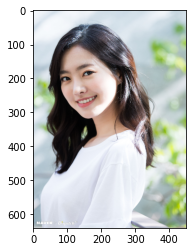

degree:  15.524110996754272
(124, 238)
(x, y): (47, 161)
(w, h): (155, 155)


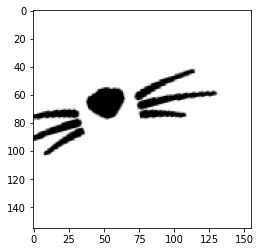

(x, y): (47, 161)


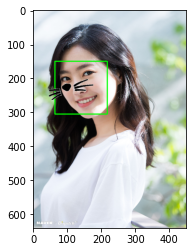

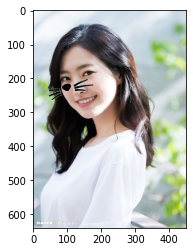

In [32]:
## 원본 이미지를 불러오고, 640 x 450으로 리사이징 한다.
## 세로가 긴 사진이므로 x, y 값을 바꾸고 가로 값을 더 여유를 주었다.
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/step4_jinseyeon.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (450, 640))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

## 이미지 위에 얼굴을 detection 하여 정사각형 박스 형태로 출력한다.
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

## 42부터 39까지의 눈매 거리를 계산하여 각도 측정
import math

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x_tilt = abs(landmark[39][0] - landmark[42][0])
    y_tilt = abs(landmark[39][1] - landmark[42][1])
    z_tilt = math.sqrt(x_tilt ** 2 + y_tilt ** 2)
    degree_tilt = math.degrees(math.acos(x_tilt / z_tilt))
    
    print('degree: ', degree_tilt)
    
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0] - dlib_rect.width() // 2
    y = landmark[30][1] - dlib_rect.width() // 2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/catmustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

tilt = cv2.getRotationMatrix2D((x, y), degree_tilt, 1)
tilt_sticker = cv2.warpAffine(img_sticker, tilt, (w, h), borderValue=(255,255,255))
tilt_sticker = cv2.resize(tilt_sticker, (w, h))

plt.imshow(tilt_sticker)
plt.show()

refined_x = x
refined_y = y
print('(x, y): (%d, %d)'%(refined_x, refined_y))

## 결과 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 결과 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 6. 프로젝트 회고

+ 각도는 좌측으로 트는 데에는 성공했는데, 이미지 코에 정확하게 오게 하는 부분은 추가 수정이 필요하여 아쉬운 부분이다.
+ 이미지가 우측으로 기운 경우에는 문제가 없었는데, 좌측으로 기운 부분에 대한 변수와 실험을 적용해서 이 문서를 수정해볼 계획이다.